In [116]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
cmfont = {'fontname':'Times New Roman'}
hfont = {'fontname':'Helvetica'}
import matplotlib as mpl
from matplotlib import rc
import matplotlib.ticker as mtick
#rc['text', usetex=True]
mpl.rc('font',family='Times New Roman', size='12',  weight= 'bold')
from matplotlib.pyplot import gca
os.chdir('F:\LJ_DAE')
rc('text', usetex=True)
import matplotlib
import numpy as np
import matplotlib.cm as cm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

matplotlib.rcParams['xtick.direction'] = 'out'
matplotlib.rcParams['ytick.direction'] = 'out'

import matplotlib.gridspec as gridspec

import zipfile

In [117]:
network_dir = os.path.join('E:\Research Thesis\Paper\VAE_Improved_Sampling\Final_Result\Result')
result_dir = 'E:\Research Thesis\Paper\VAE_Improved_Sampling\Result'
os.chdir(network_dir)
os.listdir()

['Dens_Processed_QU.txt',
 'get_result.sh',
 'Net_250_200_125_75_lam_0.00001',
 'Net_250_200_125_75_lam_0.00005',
 'Net_250_200_125_75_lam_0.0001',
 'Net_250_200_150_100_lam_0.00001',
 'Net_250_200_150_100_lam_0.00005',
 'Net_250_200_150_100_lam_0.0001',
 'RDFs_Processed_QU.txt',
 'Res_add.text',
 'Temps_Processed_QU.txt']

In [118]:
list_of_network = [l for l in os.listdir() if l[:3]=='Net']

In [ ]:
# List_of_Networks

AttributeError: 'AxesSubplot' object has no attribute 'add_axes'

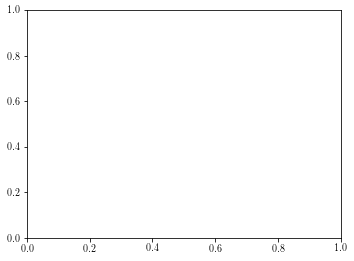

In [16]:
r =  np.linspace(0,1.5, 301)
r =  r[50:]
lw_ave = 2.25
lw_dl = 2.5
shift = 2.5
r =  np.linspace(0,1.5, 301)
r =  r[50:]
lw_ave = 2.00
lw_dl = 2.25
e_label = ['a. ', 'b. ', 'c. ', 'd. ', 'e. ', 'f. ']
shift = 2.5
list_rdf = [0,8,9]
n_bins = 100

for net in list_of_network:
    
    fig = plt.figure(figsize=(18, 9))
    gs = gridspec.GridSpec(2, 3, wspace=0.1, hspace=0.15)
    for j in range(2):
        os.chdir(network_dir)
        os.chdir(net)
        if j == 0:
            os.chdir('TrainResult')
            for i in range(3):
                ax = plt.subplot(gs[0, i])
                left, bottom, width, height = [0.25, 0.6, 0.2, 0.2]
                ax2 = ax.add_axes([left, bottom, width, height])
                
                
                data_dl = np.loadtxt('DLPredicted_RDF.'+str(list_rdf[i])+'.0.txt')
                data_ave =np.loadtxt('Ave_RDFs.'+str(list_rdf[i])+'.0.txt')
                data_frame = np.loadtxt('Frame_RDFs.'+str(list_rdf[i])+'.0.txt')
                
                data_upper_bound = np.zeros_like(data_dl)
                data_lower_bound = 4.0*np.ones_like(data_dl)
                
                h_hist_fr = np.zeros((data_ave.shape[0], n_bins+1))
                h_hist_dl = np.zeros((data_ave.shape[0], n_bins+1))
                e_hist = np.linspace(-1.0, 1.0, n_bins+1)
                dh = (e_hist[1]-e_hist[0])
                print(np.argmax(data_ave))
                print((e_hist[1]-e_hist[0]))
                
                for k in range(800):
                    data_frame = np.loadtxt('Frame_RDFs.'+str(list_rdf[i])+'.'+str(k)+'.txt')
                    data_dl = np.loadtxt('DLPredicted_RDF.'+str(list_rdf[i])+'.'+str(k)+'.txt')
                        
                    data_upper_bound = np.max([data_frame, data_upper_bound], axis=0)
                    data_lower_bound = np.min([data_frame, data_lower_bound], axis=0)
                    error_f_frame = data_frame-data_ave
                    error_f_dl = data_dl -data_ave
                    
                    for m in range(error_f_ave.shape[0]):
                        n_hist = int((error_f_frame[m]-np.min(e_hist)+dh/2)/dh)
                        h_hist_fr[m][n_hist] += 1
                        n_hist = int((error_f_dl[m]-np.min(e_hist)+dh/2)/dh)
                        h_hist_dl[m][n_hist] += 1
                            
                ax.fill_between(r, data_lower_bound, data_upper_bound, where= data_upper_bound > data_lower_bound, facecolor='k', alpha=0.2, interpolate=True)
                data_smooth = np.array([(data_frame[i-1]+data_frame[i]+data_frame[i+1])/3 if i > 0 and i <data_frame.shape[0]-1 else  data_frame[i] for i in range(data_frame.shape[0])])
                
                ax.plot(r,data_dl, 'r-', lw=lw_dl, alpha=0.6, label='DAE Prediction')
                ax.plot(r, data_ave,'k--', lw=lw_ave, alpha=0.9, label='MD Long-Run')
                ax.text(-0.05, 1.06, e_label[i+3*j], transform= ax.transAxes, size=16, weight='bold')
                ax.set_xlim(0.25, 1.5)
                ax.set_ylim(0.0, 3.0)
#                 hax.set_ylim(-3.0, 1.0)


                plt.setp(ax.get_xticklabels([]), visible=False)
                if not i == 0:
                    plt.setp(ax.get_yticklabels([]), visible=False)
                if i ==0 :
                    ax.set_ylabel('g(r)', fontsize=15)
                if i == 0  and j ==0 :
                    ax.legend(frameon=False,  fontsize=10, loc=0)

        elif j == 1:
            os.chdir('ValResult')
        
            for i in range(3):
                ax = plt.subplot(gs[1, i])
                data_dl = np.loadtxt('DLPredicted_RDF.'+str(2*i)+'.0.txt')
                data_ave =np.loadtxt('Ave_RDFs.'+str(2*i)+'.0.txt')
                data_frame = np.loadtxt('Frame_RDFs.'+str(2*i)+'.0.txt')
                
                data_upper_bound = np.zeros_like(data_dl)
                data_lower_bound = 4.0*np.ones_like(data_dl)
            
                for k in range(400):
                    data_frame = np.loadtxt('Frame_RDFs.'+str(2*i)+'.'+str(k)+'.txt')
                    data_upper_bound = np.max([data_frame, data_upper_bound], axis=0)
                    data_lower_bound = np.min([data_frame, data_lower_bound], axis=0)
                
                ax.fill_between(r, data_lower_bound, data_upper_bound, where= data_upper_bound > data_lower_bound, facecolor='k', alpha=0.2, interpolate=True)
                data_smooth = np.array([(data_frame[i-1]+data_frame[i]+data_frame[i+1])/3 if i > 0 and i <data_frame.shape[0]-1 else  data_frame[i] for i in range(data_frame.shape[0])])
                
                ax.plot(r,data_dl, 'r-', lw=lw_dl, alpha=0.6)
                ax.plot(r, data_ave,'k--', lw=lw_ave, alpha=0.9)
                ax.text(-0.05, 1.06, e_label[i+3*j], transform= ax.transAxes, size=16, weight='bold')

                ax.set_xlim(0.25, 1.5)
                ax.set_ylim(0.0, 3.0)
                
                
                
                if not i == 0:
                    plt.setp(ax.get_yticklabels([]), visible=False)
                if i ==0 :
                    ax.set_ylabel('g(r)', fontsize=15)

                if j ==1:
                    ax.set_xlabel('$r$ $[nm]$', fontsize=15)
                if i == 0  and j ==0 :
                    ax.legend(frameon=False)

    os.chdir(result_dir)
    plt.savefig(net+'.prob.filled.lj.jpeg', dpi=350)
    plt.show()
    
    
    
    

28
0.020000000000000018
20
0.020000000000000018
31
0.020000000000000018


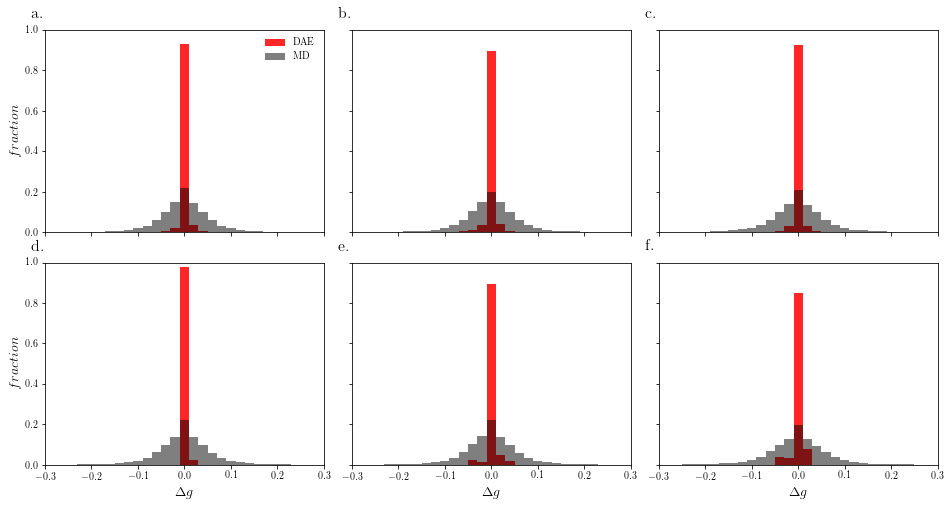

In [155]:

# plt.plot(np.zeros((10)), np.linspace(0,1,10), 'k-')
plt.show()
net = list_of_network[3]
fig = plt.figure(figsize=(16, 8))
gs = gridspec.GridSpec(2, 3, wspace=0.1, hspace=0.15)
for i in range(1):
    for j in range(2):
        os.chdir(network_dir)
        os.chdir(net)
        if j == 0:
            os.chdir('TrainResult')
            for i in range(3):
                ax = plt.subplot(gs[0, i])
                data_dl = np.loadtxt('DLPredicted_RDF.'+str(list_rdf[i])+'.0.txt')
                data_ave =np.loadtxt('Ave_RDFs.'+str(list_rdf[i])+'.0.txt')
                data_frame = np.loadtxt('Frame_RDFs.'+str(list_rdf[i])+'.0.txt')
                
                data_upper_bound = np.zeros_like(data_dl)
                data_lower_bound = 4.0*np.ones_like(data_dl)
                
                h_hist_fr = np.zeros((data_ave.shape[0], n_bins+1))
                h_hist_dl = np.zeros((data_ave.shape[0], n_bins+1))
                e_hist = np.linspace(-1.0, 1.0, n_bins+1)
                dh = (e_hist[1]-e_hist[0])
                print(np.argmax(data_ave))
                print((e_hist[1]-e_hist[0]))
                
                for k in range(800):
                    data_frame = np.loadtxt('Frame_RDFs.'+str(list_rdf[i])+'.'+str(k)+'.txt')
                    data_dl = np.loadtxt('DLPredicted_RDF.'+str(list_rdf[i])+'.'+str(k)+'.txt')
                        
                    data_upper_bound = np.max([data_frame, data_upper_bound], axis=0)
                    data_lower_bound = np.min([data_frame, data_lower_bound], axis=0)
                    error_f_frame = data_frame-data_ave
                    error_f_dl = data_dl -data_ave
                    
                    for m in range(error_f_ave.shape[0]):
                        n_hist = int((error_f_frame[m]-np.min(e_hist)+dh/2)/dh)
                        h_hist_fr[m][n_hist] += 1
                        n_hist = int((error_f_dl[m]-np.min(e_hist)+dh/2)/dh)
                        h_hist_dl[m][n_hist] += 1
                            
                ax.bar(e_hist,np.sum(h_hist_dl, axis=0)/np.sum(h_hist_dl[:,:]), width=dh,color='r', alpha=0.85, label='DAE')
                ax.bar(e_hist, np.sum(h_hist_fr, axis=0)/np.sum(h_hist_fr[:,:]), color='k', width=dh, alpha=0.5, label='MD')
#                 ax.plot(e_hist,np.sum(h_hist_dl, axis=0)/np.sum(h_hist_dl[:,:]), 'r-', alpha=0.85)
#                 ax.plot(e_hist, np.sum(h_hist_fr, axis=0)/np.sum(h_hist_fr[:,:]), 'k--', alpha=0.5)
                
                
                
                ax.text(-0.05, 1.06, e_label[i+3*j], transform= ax.transAxes, size=16, weight='bold')
                ax.set_xlim(-0.3, 0.3)
                ax.set_ylim(0.0, 1.0)
                
#                 hax.set_ylim(-3.0, 1.0)


                plt.setp(ax.get_xticklabels([]), visible=False)
                if not i == 0:
                    plt.setp(ax.get_yticklabels([]), visible=False)
                if i ==0 :
                    ax.set_ylabel('$fraction$', fontsize=14)
                if i == 0  and j ==0 :
                    ax.legend(frameon=False,  fontsize=10)

        elif j == 1:
            os.chdir('ValResult')
        
            for i in range(3):
                ax = plt.subplot(gs[1, i])
                data_dl = np.loadtxt('DLPredicted_RDF.'+str(2*i)+'.0.txt')
                data_ave =np.loadtxt('Ave_RDFs.'+str(2*i)+'.0.txt')
                data_frame = np.loadtxt('Frame_RDFs.'+str(2*i)+'.0.txt')
                
                data_upper_bound = np.zeros_like(data_dl)
                data_lower_bound = 4.0*np.ones_like(data_dl)
                
                h_hist_fr = np.zeros((data_ave.shape[0], n_bins+1))
                h_hist_dl = np.zeros((data_ave.shape[0], n_bins+1))
                e_hist = np.linspace(-1.0, 1.0, n_bins+1)
                dh = (e_hist[1]-e_hist[0])
                
            
                for k in range(800):
                    data_frame = np.loadtxt('Frame_RDFs.'+str(2*i)+'.'+str(k)+'.txt')
                    data_dl = data_dl = np.loadtxt('DLPredicted_RDF.'+str(2*i)+'.'+str(k)+'.0.txt')
                    data_upper_bound = np.max([data_frame, data_upper_bound], axis=0)
                    data_lower_bound = np.min([data_frame, data_lower_bound], axis=0)
                    error_f_frame = data_frame-data_ave
                    error_f_dl = data_dl -data_ave
                    
                    for m in range(error_f_ave.shape[0]):
                        n_hist = int((error_f_frame[m]-np.min(e_hist)+dh/2)/dh)
                        h_hist_fr[m][n_hist] += 1
                        n_hist = int((error_f_dl[m]-np.min(e_hist)+dh/2)/dh)
                        h_hist_dl[m][n_hist] += 1
                ax.bar(e_hist,np.sum(h_hist_dl, axis=0)/np.sum(h_hist_dl[:,:]), width=dh,color='r', alpha=0.85)#, 'r-')#, dh/2)
                ax.bar(e_hist, np.sum(h_hist_fr, axis=0)/np.sum(h_hist_fr[:,:]), color='k', width=dh, alpha=0.5)
#                 ax.plot(e_hist,np.sum(h_hist_dl, axis=0)/np.sum(h_hist_dl[:,:]), 'r-', alpha=0.85)
#                 ax.plot(e_hist, np.sum(h_hist_fr, axis=0)/np.sum(h_hist_fr[:,:]), 'k--', alpha=0.5)     
               
                ax.text(-0.05, 1.06, e_label[i+3*j], transform= ax.transAxes, size=16, weight='bold')

                ax.set_xlim(-0.3, 0.3)
                ax.set_ylim(0.0, 1.0)
                
                
                
                if not i == 0:
                    plt.setp(ax.get_yticklabels([]), visible=False)
                if i ==0 :
                    ax.set_ylabel('$fraction$', fontsize=14)

                if j ==1:
                    ax.set_xlabel('$\Delta g$ ', fontsize=14)
                if i == 0  and j ==0 :
                    ax.legend(frameon=False)

    os.chdir(result_dir)
    plt.savefig(net+'.error.prob.lj.jpeg', dpi=350)
    plt.show()


0.00001


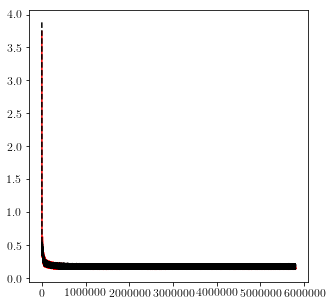

0.00005


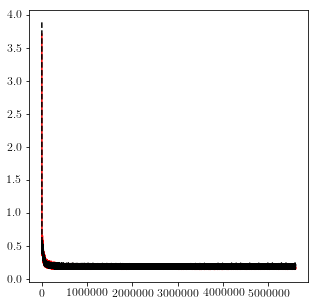

0.0001


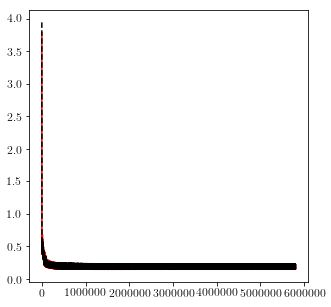

0.00001


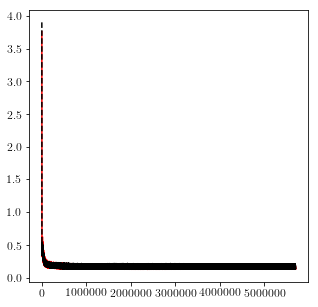

0.00005


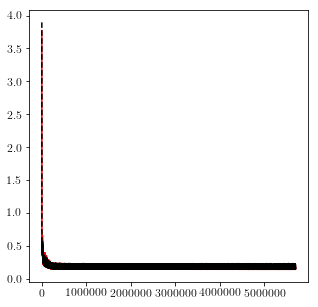

0.0001


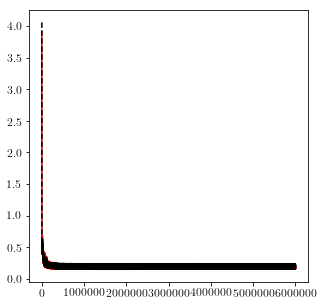

In [177]:
errors = []

for net in list_of_network:
    lam = net.split('_')[-1]
    print(lam)
    
    fig = plt.figure(figsize=(5, 5))
#     gs = gridspec.GridSpec(1, 2, wspace=0.075, hspace=0.15)
    
    os.chdir(network_dir)
    os.chdir(net)
    train_losses = np.loadtxt('train_losses.dat')
    val_losses  = np.loadtxt('val_losses.dat')
    skip = 5
    train_losses = np.array([np.mean(train_losses[skip*i:skip*(i+1)]) for i in range(int(len(train_losses)/skip) )])
    val_losses = np.array([np.mean(val_losses[skip*i:skip*(i+1)]) for i in range(int(len(val_losses)/skip) )])

    steps = np.array([10*skip*i for i in range(len(train_losses))])
    
    plt.plot(steps, train_losses, 'r-')
    plt.plot(steps, val_losses, 'k--')
    
    errors.append([net, lam, train_losses[-1],val_losses[-1] ])
    
    
    
    
    plt.show()
    




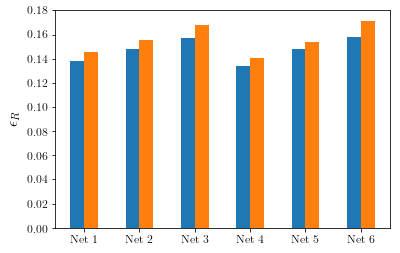

In [178]:
# for cnt, error in enumerate(errors):
#     lam = error[1]
#     num = error[0].split('_')[3]
#     plt.scatter(cnt, error[2], marker='s', label=num)
#     plt.scatter(lam, error[3],marker='o',label=num)
os.chdir(result_dir)
fig = plt.figure(figsize=(6,4))
ax = fig.subplots()

index = np.arange(6)
width_t = np.array([float(errors[i][2]) for i in range(6)])
width_v = np.array([float(errors[i][3]) for i in range(6)])

ax.bar(index-1/8, width_t, width=1/4)
ax.bar(index+1/8, width_v, width=1/4)
ax.set_ylabel('$\epsilon_{R}$', fontsize=16)
ax.set_xticks(index)
ax.set_ylim(0,0.18)
ax.set_xticklabels(['Net '+str(i) for i in range(1, 7)])
plt.savefig('Histogram.jpeg', dpi=250)
plt.show()

0
33
0.020000000000000018
1
31
0.020000000000000018
2
36
0.020000000000000018
3
28
0.020000000000000018


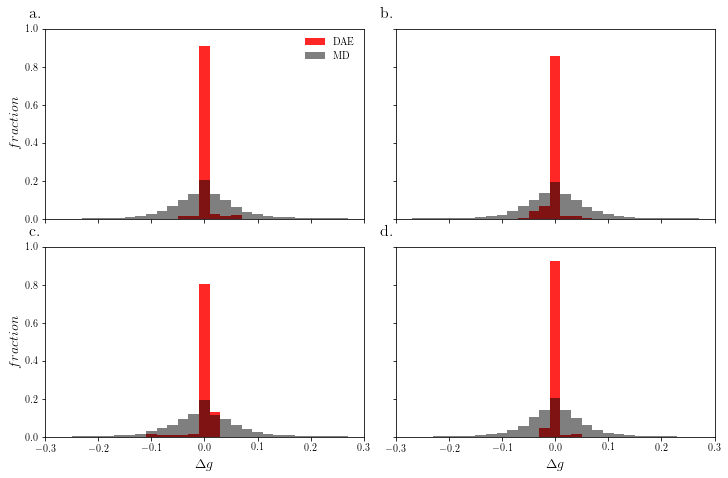

In [162]:
r =  np.linspace(0,1.5, 301)
r =  r[50:]
lw_ave = 2.25
lw_dl = 2.5
e_label = ['a. ', 'b. ', 'c. ', 'd. ']
shift = 2.5
net = list_of_network[3]
fig = plt.figure(figsize=(12, 7.5))
gs = gridspec.GridSpec(2, 2, wspace=0.1, hspace=0.15)
for i in range(1):
    os.chdir(network_dir)
    os.chdir(net)
    os.chdir('QUResult')
    
    for i in range(2):
        for j in range(2):
            ax = plt.subplot(gs[i, j])
            print(2*i+j)
            data_dl = np.loadtxt('DLPredicted_RDF.'+str(2*i+j)+'.0.txt')
            data_ave =np.loadtxt('Ave_RDFs.'+str(2*i+j)+'.0.txt')
            data_frame = np.loadtxt('Frame_RDFs.'+str(2*i+j)+'.0.txt')
            
            data_upper_bound = np.zeros_like(data_dl)
            data_lower_bound = 4.0*np.ones_like(data_dl)
            h_hist_fr = np.zeros((data_ave.shape[0], n_bins+1))
            h_hist_dl = np.zeros((data_ave.shape[0], n_bins+1))
            e_hist = np.linspace(-1.0, 1.0, n_bins+1)
            dh = (e_hist[1]-e_hist[0])
            print(np.argmax(data_ave))
            print((e_hist[1]-e_hist[0]))
                
            for k in range(90):
                data_frame = np.loadtxt('Frame_RDFs.'+str(2*i+j)+'.'+str(k)+'.txt')
                data_upper_bound = np.max([data_frame, data_upper_bound], axis=0)
                data_lower_bound = np.min([data_frame, data_lower_bound], axis=0)
                error_f_frame = data_frame-data_ave
                error_f_dl = data_dl -data_ave
                    
                for m in range(error_f_ave.shape[0]):
                    n_hist = int((error_f_frame[m]-np.min(e_hist)+dh/2)/dh)
                    h_hist_fr[m][n_hist] += 1
                    n_hist = int((error_f_dl[m]-np.min(e_hist)+dh/2)/dh)
                    h_hist_dl[m][n_hist] += 1
                            
            ax.bar(e_hist,np.sum(h_hist_dl, axis=0)/np.sum(h_hist_dl[:,:]), width=dh,color='r', alpha=0.85, label='DAE')
            ax.bar(e_hist, np.sum(h_hist_fr, axis=0)/np.sum(h_hist_fr[:,:]), color='k', width=dh, alpha=0.5, label='MD')
    

            ax.text(-0.05, 1.06, e_label[2*i+j], transform= ax.transAxes, size=16, weight='bold')
            
            ax.set_xlim(-0.3, 0.3)
            ax.set_ylim(0.0, 1.0)

            if i == 0:
                plt.setp(ax.get_xticklabels([]), visible=False)
            if not j == 0:
                plt.setp(ax.get_yticklabels([]), visible=False)
            if j ==0 :
                ax.set_ylabel('$fraction$', fontsize=14)
            if i == 1:
                ax.set_xlabel('$\Delta g$', fontsize=14)
            if i == 0  and j ==0 :
                ax.legend(frameon=False,  fontsize=10)


    os.chdir(result_dir)
    plt.savefig(net+'.fraction.QU.jpeg', dpi=350)
    plt.show()

In [113]:
np.sum(h_hist_dl, axis=0)/np.sum(h_hist_dl[:,:])

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.03984064, 0.03187251,
       0.84860558, 0.07968127, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

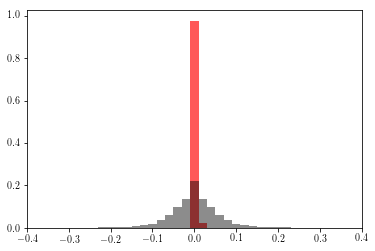

In [149]:
plt.bar(e_hist,np.sum(h_hist_dl, axis=0)/np.sum(h_hist_dl[:,:]), width=dh,color='r', alpha=0.65)
plt.bar(e_hist, np.sum(h_hist_fr, axis=0)/np.sum(h_hist_fr[:,:]), color='k', width=dh, alpha=0.45)
plt.xlim(-0.4, 0.4)
plt.show()

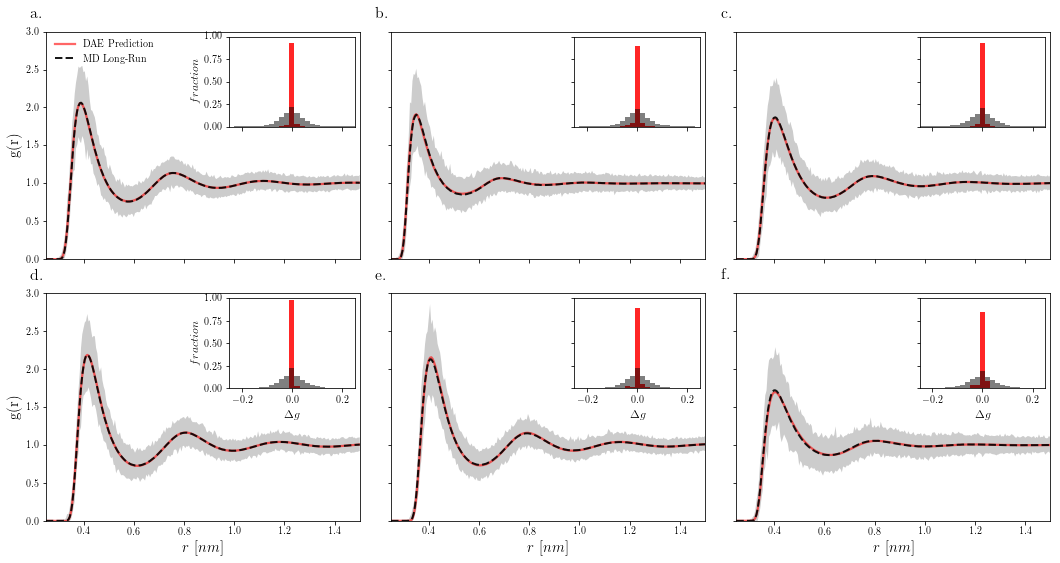

In [23]:
from mpl_toolkits.axes_grid.inset_locator import inset_axes

r =  np.linspace(0,1.5, 301)
r =  r[50:]
lw_ave = 2.25
lw_dl = 2.5
shift = 2.5
r =  np.linspace(0,1.5, 301)
r =  r[50:]
lw_ave = 2.00
lw_dl = 2.25
e_label = ['a. ', 'b. ', 'c. ', 'd. ', 'e. ', 'f. ']
shift = 2.5
list_rdf = [0,8,9]
n_bins = 100
net = list_of_network[3]

for lsa in [1]:
    
    fig = plt.figure(figsize=(18, 9))
    gs = gridspec.GridSpec(2, 3, wspace=0.1, hspace=0.15)
    for j in range(2):
        os.chdir(network_dir)
        os.chdir(net)
        if j == 0:
            os.chdir('TrainResult')
            for i in range(3):
                ax = plt.subplot(gs[0, i])
                
                ax2 = inset_axes(ax,
                        width="40%", # width = 30% of parent_bbox
                        height=1.25, # height : 1 inch
                        loc=1)
#                 ax2 = ax.add_axes([left, bottom, width, height])
                
                
                data_dl = np.loadtxt('DLPredicted_RDF.'+str(list_rdf[i])+'.0.txt')
                data_ave =np.loadtxt('Ave_RDFs.'+str(list_rdf[i])+'.0.txt')
                data_frame = np.loadtxt('Frame_RDFs.'+str(list_rdf[i])+'.0.txt')
                
                data_upper_bound = np.zeros_like(data_dl)
                data_lower_bound = 4.0*np.ones_like(data_dl)
                
                h_hist_fr = np.zeros((data_ave.shape[0], n_bins+1))
                h_hist_dl = np.zeros((data_ave.shape[0], n_bins+1))
                e_hist = np.linspace(-1.0, 1.0, n_bins+1)
                dh = (e_hist[1]-e_hist[0])
                 
                for k in range(800):
                    data_frame = np.loadtxt('Frame_RDFs.'+str(list_rdf[i])+'.'+str(k)+'.txt')
                    data_dl = np.loadtxt('DLPredicted_RDF.'+str(list_rdf[i])+'.'+str(k)+'.txt')
                    
                    data_upper_bound = np.max([data_frame, data_upper_bound], axis=0)
                    data_lower_bound = np.min([data_frame, data_lower_bound], axis=0)
                    error_f_frame = data_frame-data_ave
                    error_f_dl = data_dl -data_ave
                    
                    for m in range(error_f_dl.shape[0]):
                        n_hist = int((error_f_frame[m]-np.min(e_hist)+dh/2)/dh)
                        h_hist_fr[m][n_hist] += 1
                        n_hist = int((error_f_dl[m]-np.min(e_hist)+dh/2)/dh)
                        h_hist_dl[m][n_hist] += 1
                            
                ax2.bar(e_hist,np.sum(h_hist_dl, axis=0)/np.sum(h_hist_dl[:,:]), width=dh,color='r', alpha=0.85, label='DAE')
                ax2.bar(e_hist, np.sum(h_hist_fr, axis=0)/np.sum(h_hist_fr[:,:]), color='k', width=dh, alpha=0.5, label='MD')
                ax2.set_ylim(0,1)
                ax2.set_xlim(-.25,.25)
                            
                ax.fill_between(r, data_lower_bound, data_upper_bound, where= data_upper_bound > data_lower_bound, facecolor='k', alpha=0.2, interpolate=True)
                data_smooth = np.array([(data_frame[i-1]+data_frame[i]+data_frame[i+1])/3 if i > 0 and i <data_frame.shape[0]-1 else  data_frame[i] for i in range(data_frame.shape[0])])
                
                ax.plot(r,data_dl, 'r-', lw=lw_dl, alpha=0.6, label='DAE Prediction')
                ax.plot(r, data_ave,'k--', lw=lw_ave, alpha=0.9, label='MD Long-Run')
                ax.text(-0.05, 1.06, e_label[i+3*j], transform= ax.transAxes, size=16, weight='bold')
                ax.set_xlim(0.25, 1.5)
                ax.set_ylim(0.0, 3.0)
#                 hax.set_ylim(-3.0, 1.0)


                plt.setp(ax.get_xticklabels([]), visible=False)
                plt.setp(ax2.get_xticklabels([]), visible=False)
                if not i == 0:
                    plt.setp(ax.get_yticklabels([]), visible=False)
                    plt.setp(ax2.get_yticklabels([]), visible=False)
                if i ==0 :
                    ax.set_ylabel('g(r)', fontsize=15)
                    ax2.set_ylabel('$fraction$', fontsize=12)
                if i == 0  and j ==0 :
                    ax.legend(frameon=False,  fontsize=10, loc=2)

        elif j == 1:
            os.chdir('ValResult')
        
            for i in range(3):
                ax = plt.subplot(gs[1, i])
                ax2 = inset_axes(ax,
                        width="40%", # width = 30% of parent_bbox
                        height=1.25, # height : 1 inch
                        loc=1)
                data_dl = np.loadtxt('DLPredicted_RDF.'+str(2*i)+'.0.txt')
                data_ave =np.loadtxt('Ave_RDFs.'+str(2*i)+'.0.txt')
                data_frame = np.loadtxt('Frame_RDFs.'+str(2*i)+'.0.txt')
                
                data_upper_bound = np.zeros_like(data_dl)
                data_lower_bound = 4.0*np.ones_like(data_dl)
             
                h_hist_fr = np.zeros((data_ave.shape[0], n_bins+1))
                h_hist_dl = np.zeros((data_ave.shape[0], n_bins+1))
                e_hist = np.linspace(-1.0, 1.0, n_bins+1)
                dh = (e_hist[1]-e_hist[0])
                
                for k in range(800):
                    data_frame = np.loadtxt('Frame_RDFs.'+str(2*i)+'.'+str(k)+'.txt')
                    datal_dl = np.loadtxt('DLPredicted_RDF.'+str(2*i)+'.'+str(k)+'.txt')
                    data_upper_bound = np.max([data_frame, data_upper_bound], axis=0)
                    data_lower_bound = np.min([data_frame, data_lower_bound], axis=0)
                    
                    error_f_frame = data_frame-data_ave
                    error_f_dl = data_dl -data_ave
                    
                    for m in range(error_f_dl.shape[0]):
                        n_hist = int((error_f_frame[m]-np.min(e_hist)+dh/2)/dh)
                        h_hist_fr[m][n_hist] += 1
                        n_hist = int((error_f_dl[m]-np.min(e_hist)+dh/2)/dh)
                        h_hist_dl[m][n_hist] += 1
                            
                ax2.bar(e_hist,np.sum(h_hist_dl, axis=0)/np.sum(h_hist_dl[:,:]), width=dh,color='r', alpha=0.85, label='DAE')
                ax2.bar(e_hist, np.sum(h_hist_fr, axis=0)/np.sum(h_hist_fr[:,:]), color='k', width=dh, alpha=0.5, label='MD')
                ax2.set_ylim(0,1)
                ax2.set_xlim(-.25,.25)
                
                ax.fill_between(r, data_lower_bound, data_upper_bound, where= data_upper_bound > data_lower_bound, facecolor='k', alpha=0.2, interpolate=True)
                data_smooth = np.array([(data_frame[i-1]+data_frame[i]+data_frame[i+1])/3 if i > 0 and i <data_frame.shape[0]-1 else  data_frame[i] for i in range(data_frame.shape[0])])
                
                ax.plot(r,data_dl, 'r-', lw=lw_dl, alpha=0.6)
                ax.plot(r, data_ave,'k--', lw=lw_ave, alpha=0.9)
                ax.text(-0.05, 1.06, e_label[i+3*j], transform= ax.transAxes, size=16, weight='bold')

                ax.set_xlim(0.25, 1.5)
                ax.set_ylim(0.0, 3.0)
                
                if not i == 0:
                    plt.setp(ax.get_yticklabels([]), visible=False)
                    plt.setp(ax2.get_yticklabels([]), visible=False)
                if i ==0 :
                    ax.set_ylabel('g(r)', fontsize=15)
                    ax2.set_ylabel('$fraction$', fontsize=12)

                if j ==1:
                    ax.set_xlabel('$r$ $[nm]$', fontsize=15)
                    ax2.set_xlabel('$\Delta g$', fontsize=12)
                if i == 0  and j ==0 :
                    ax.legend(frameon=False)

    os.chdir(result_dir)
    plt.savefig(net+'.prob.filled.lj.jpeg', dpi=350)
    plt.show()
    
    
    
    

0
33
0.020000000000000018
1
31
0.020000000000000018
2
36
0.020000000000000018
3
28
0.020000000000000018


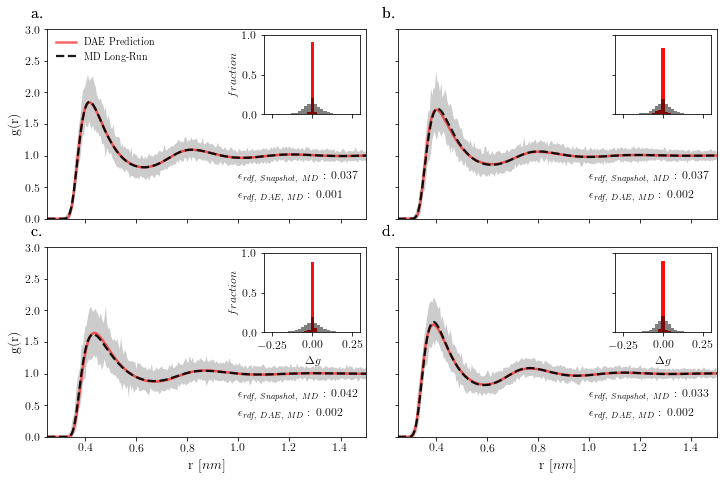

In [129]:
r =  np.linspace(0,1.5, 301)
r =  r[50:]
lw_ave = 2.25
lw_dl = 2.5
e_label = ['a. ', 'b. ', 'c. ', 'd. ']
shift = 2.5
net = list_of_network[3]
fig = plt.figure(figsize=(12, 7.5))
gs = gridspec.GridSpec(2, 2, wspace=0.1, hspace=0.15)
for i in range(1):
    os.chdir(network_dir)
    os.chdir(net)
    os.chdir('QUResult')
    
    for i in range(2):
        for j in range(2):
            ax = plt.subplot(gs[i, j])
            ax2 = inset_axes(ax,
                        width="30%", # width = 30% of parent_bbox
                        height=1.1, # height : 1 inch
                        loc=1)
            
            print(2*i+j)
            data_dl = np.loadtxt('DLPredicted_RDF.'+str(2*i+j)+'.0.txt')
            data_ave =np.loadtxt('Ave_RDFs.'+str(2*i+j)+'.0.txt')
            data_frame = np.loadtxt('Frame_RDFs.'+str(2*i+j)+'.0.txt')
            
            data_upper_bound = np.zeros_like(data_dl)
            data_lower_bound = 4.0*np.ones_like(data_dl)
            h_hist_fr = np.zeros((data_ave.shape[0], n_bins+1))
            h_hist_dl = np.zeros((data_ave.shape[0], n_bins+1))
            e_hist = np.linspace(-1.0, 1.0, n_bins+1)
            dh = (e_hist[1]-e_hist[0])
            print(np.argmax(data_ave))
            print((e_hist[1]-e_hist[0]))
            e_rdf_dl =0.0
            e_rdf_fr = 0.0
            for k in range(90):
                data_frame = np.loadtxt('Frame_RDFs.'+str(2*i+j)+'.'+str(k)+'.txt')
                data_dl = np.loadtxt('DLPredicted_RDF.'+str(2*i+j)+'.'+str(k)+'.txt')#'Frame_RDFs.'+str(2*i+j)+'.'+str(k)+'.txt')
                data_upper_bound = np.max([data_frame, data_upper_bound], axis=0)
                data_lower_bound = np.min([data_frame, data_lower_bound], axis=0)
                error_f_frame = data_frame-data_ave
                error_f_dl = data_dl -data_ave
                e_rdf_dl += np.trapz(np.abs(data_dl- data_ave)*r**2, r)/np.trapz(np.abs(data_ave)*r**2, r)
                e_rdf_fr += np.trapz(np.abs(data_frame-data_ave)*r**2, r)/np.trapz(np.abs(data_ave)*r**2, r)
                    
                for m in range(error_f_dl.shape[0]):
                    n_hist = int((error_f_frame[m]-np.min(e_hist)+dh/2)/dh)
                    h_hist_fr[m][n_hist] += 1
                    n_hist = int((error_f_dl[m]-np.min(e_hist)+dh/2)/dh)
                    h_hist_dl[m][n_hist] += 1
                            
            ax2.bar(e_hist,np.sum(h_hist_dl, axis=0)/np.sum(h_hist_dl[:,:]), width=dh,color='r', alpha=0.95, label='DAE')
            ax2.bar(e_hist, np.sum(h_hist_fr, axis=0)/np.sum(h_hist_fr[:,:]), color='k', width=dh, alpha=0.5, label='MD')
            ax2.set_ylim(0,1)
            ax2.set_xlim(-.25,.25)
            e_rdf_dl /= 90
            e_rdf_fr /= 90
            ax.text(0.6, 0.1, '$\epsilon_{rdf,\ DAE,\ MD}$ : '+str(np.round(e_rdf_dl,3)),transform= ax.transAxes, size=12)
            ax.text(0.6, 0.2, '$\epsilon_{rdf,\ Snapshot,\ MD}$ : '+str(np.round(e_rdf_fr,3)),transform= ax.transAxes, size=12)

            ax.fill_between(r, data_lower_bound, data_upper_bound, where= data_upper_bound > data_lower_bound, facecolor='k', alpha=0.2, interpolate=True)
            data_smooth = np.array([(data_frame[i-1]+data_frame[i]+data_frame[i+1])/3 if i > 0 and i <data_frame.shape[0]-1 else  data_frame[i] for i in range(data_frame.shape[0])])
                
            ax.plot(r,data_dl, 'r-', lw=lw_dl, alpha=0.6, label='DAE Prediction')
            ax.plot(r, data_ave,'k--', lw=lw_ave, alpha=0.9, label='MD Long-Run')
            


            ax.text(-0.05, 1.06, e_label[2*i+j], transform= ax.transAxes, size=16, weight='bold')
            
            ax.set_xlim(0.25, 1.5)
            ax.set_ylim(0.0, 3.0)

            ax.text(-0.05, 1.06, e_label[2*i+j], transform= ax.transAxes, size=16, weight='bold')
            
            ax2.set_xlim(-0.3, 0.3)
            ax2.set_ylim(0.0, 1.0)

            if i == 0:
                plt.setp(ax.get_xticklabels([]), visible=False)
                plt.setp(ax2.get_xticklabels([]), visible=False)
            if not j == 0:
                plt.setp(ax.get_yticklabels([]), visible=False)
                plt.setp(ax2.get_yticklabels([]), visible=False)
            if j ==0 :
                ax.set_ylabel('g(r)', fontsize=14)
                ax2.set_ylabel('$fraction$', fontsize=12)
            if i == 1:
                ax.set_xlabel('r $[nm]$', fontsize=14)
                ax2.set_xlabel('$\Delta g$', fontsize=12)
            if i == 0  and j ==0 :
                ax.legend(frameon=False,  fontsize=10, loc=2)


    os.chdir(result_dir)
    plt.savefig(net+'.prob.filled.QU.jpeg', dpi=350)
    plt.show()

In [39]:
(3000/10)**(1/3)

6.694329500821694

In [40]:
(3000/18)**(1/3)

5.503212081491044

In [41]:
Argon_Path = 'E:\Research Thesis\Paper\VAE_Improved_Sampling\Final_Result\ArgonResult'

In [44]:
os.chdir(Argon_Path)
C12 = 9.7e-6 
C6 = 6.22e-3
def force(r, C12, C6):
    return -12*C12/r**13 + 6*C6/r**7
def potential(r, C12, C6):
    return C12/r**12 - C6/r**6

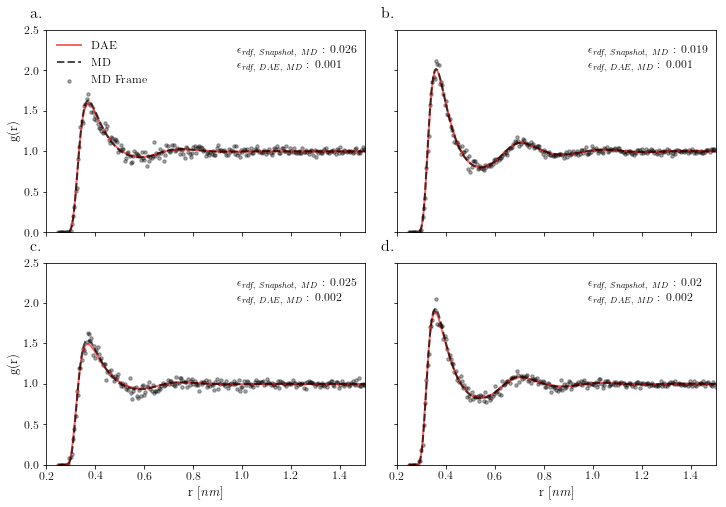

0 1.0276400685468807
0 1.0181392945970618
1 0.999082910537025
1 0.9877576849926967
2 1.0478875953392337
2 1.0457790302873913
3 1.045970384446286
3 1.0344900269358779
0 1.015118570062247
0 0.9979590449456763
1 1.007082847142508
1 1.0008063350394283
2 1.0025797994305938
2 0.996845990065304
3 1.0025154916780554
3 1.000450787405593


In [128]:
kB = 0.0083154
Temps = [300., 300., 390., 390.]
Dens = [10., 18., 10., 18.]
r = np.linspace(0, 1.5, 301)
r = r[50:]
P_DL = []
P_MD = []
P_Fr = []
X_DL = []
X_MD = []
X_Fr = []

fig = plt.figure(figsize=(12, 8))
gs = gridspec.GridSpec(2, 2, wspace=0.1, hspace=0.15)
e_label = ['a. ', 'b. ', 'c. ', 'd. ']

for i in range(4):
    
    os.chdir(Argon_Path)
    os.chdir('Sys'+str(i+1))
    if i ==0 :
        cnt = 0
        j = 0
    elif i ==1:
        cnt = 0
        j = 1
    elif i == 2:
        cnt = 1
        j = 0
    elif i==3:
        cnt = 1
        j = 1
    ax = plt.subplot(gs[cnt, j])
    
    RDF_Fr = np.loadtxt('CG-CG.DAE.dist.new',usecols=1)[50:]
    RDF_DAE = np.loadtxt('CG-CG.DAE.Predicted.dist.new')
    RDF_MD = np.loadtxt('CG-CG.MD.AVE.dist.new', usecols=1)[50:]
    ax.scatter(r, RDF_Fr,s=12, marker='o',c='k', alpha=0.35, label='MD Frame')
    ax.plot(r, RDF_DAE,'r-', alpha=0.6, lw=2.0, label='DAE')
    ax.plot(r, RDF_MD,'k--', alpha=0.7, lw=2.0, label='MD')
    
    ax.set_ylim(0,2.5)
    ax.set_xlim(0.2,1.5)
    
    e_rdf_dl = np.trapz(np.abs(RDF_DAE- RDF_MD)*r**2, r)/np.trapz(np.abs(RDF_MD)*r**2, r)
    e_rdf_fr = np.trapz(np.abs(RDF_Fr-RDF_MD)*r**2, r)/np.trapz(np.abs(RDF_MD)*r**2, r)
    
    
    ax.text(0.6, 0.8, '$\epsilon_{rdf,\ DAE,\ MD}$ : '+str(np.round(e_rdf_dl, 3)), transform= ax.transAxes, size=12)
    ax.text(0.6, 0.875, '$\epsilon_{rdf,\ Snapshot,\ MD}$ : '+str(np.round(e_rdf_fr, 3)), transform= ax.transAxes, size=12)

    ax.text(-0.05, 1.06, e_label[i], transform= ax.transAxes, size=16, weight='bold')
    
    P_DL.append((-Dens[i]**2*2*np.pi*np.trapz(r**3*force(r,C12, C6)*RDF_DAE/3, r)+Dens[i]*kB*Temps[i]))
    P_Fr.append((-Dens[i]**2*2*np.pi*np.trapz(r**3*force(r,C12, C6)*RDF_Fr/3, r)+Dens[i]*kB*Temps[i]))
    P_MD.append(np.loadtxt('Pressure_Energy.dat',usecols=1,skiprows=7)/16.6054)
     #1/ρT[1+4πρ∫_0^r▒〖(g(r)-1) r^2 dr〗]   
    X_DL.append((1+4*np.pi*np.trapz((RDF_DAE-1)*r**2,r))/(Dens[i]*Temps[i]))
    X_MD.append((1+4*np.pi*np.trapz((RDF_MD-1)*r**2,r))/(Dens[i]*Temps[i]))
    X_Fr.append((1+4*np.pi*np.trapz((RDF_Fr-1)*r**2,r))/(Dens[i]*Temps[i]))
    if i ==0 :
        ax.set_ylabel('g(r)', **cmfont,fontsize=13)
        plt.setp(ax.get_xticklabels([]), visible=False)
        ax.legend(frameon=False,loc=2)
    elif i ==1:
        plt.setp(ax.get_xticklabels([]), visible=False)
        plt.setp(ax.get_yticklabels([]), visible=False)
    elif i == 2:
        ax.set_xlabel('r $[nm]$', **cmfont,fontsize=13)
        ax.set_ylabel('g(r)', **cmfont,fontsize=13)
    elif i==3:
        ax.set_xlabel('r $[nm]$', **cmfont,fontsize=13)
        plt.setp(ax.get_yticklabels([]), visible=False)
        
    
    

os.chdir(result_dir)
plt.savefig('Argon.jpeg', dpi=300)
plt.show()
        
# print(P_MD)
# print(P_DL)
# print(P_Fr)
for i in range(4):
    print(i, P_Fr[i]/P_MD[i])
    print(i , P_DL[i]/P_MD[i])

# print(X_MD)
# print(X_DL)
# print(X_Fr)

for i in range(4):
    print(i, X_Fr[i]/X_MD[i])
    print(i, X_DL[i]/X_MD[i])
# print(X_MD, X_DL, X_Fr)

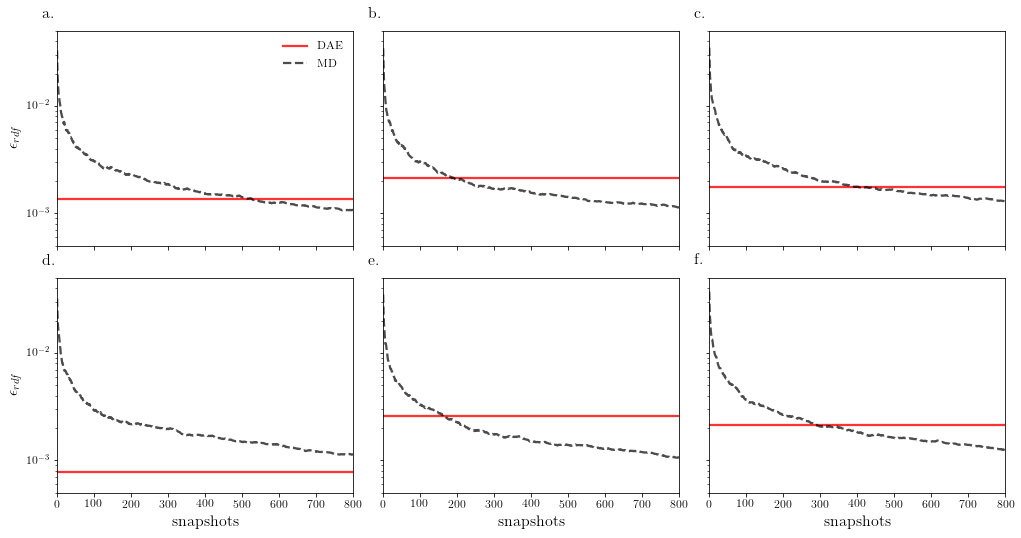

In [153]:
from mpl_toolkits.axes_grid.inset_locator import inset_axes

r =  np.linspace(0,1.5, 301)
r =  r[50:]
lw_ave = 2.25
lw_dl = 2.5
shift = 2.5
r =  np.linspace(0,1.5, 301)
r =  r[50:]
lw_ave = 2.00
lw_dl = 2.25
e_label = ['a. ', 'b. ', 'c. ', 'd. ', 'e. ', 'f. ']
shift = 2.5
list_rdf = [0,8,9]
n_bins = 100
net = list_of_network[3]

for lsa in [1]:
    
    fig = plt.figure(figsize=(17, 8.5))
    gs = gridspec.GridSpec(2, 3, wspace=0.1, hspace=0.15)
    for j in range(2):
        os.chdir(network_dir)
        os.chdir(net)
        if j == 0:
            os.chdir('TrainResult')
            for i in range(3):
                ax = plt.subplot(gs[0, i])
                
                data_dl = np.loadtxt('DLPredicted_RDF.'+str(list_rdf[i])+'.0.txt')
                data_ave =np.loadtxt('Ave_RDFs.'+str(list_rdf[i])+'.0.txt')
                data_frame = np.loadtxt('Frame_RDFs.'+str(list_rdf[i])+'.0.txt')
               
                e_rdf_fr_run = []
                e_rdf_dl_run = []
                
                data_fr_run = np.zeros_like(data_frame)
                data_dl_run = np.zeros_like(data_frame)
                e_rdf_dl = np.trapz(np.abs(data_dl- data_ave)*r**2, r)/np.trapz(np.abs(data_ave)*r**2, r)
                
                for k in range(800):
                    data_frame = np.loadtxt('Frame_RDFs.'+str(list_rdf[i])+'.'+str(k)+'.txt')
                    data_dl = np.loadtxt('DLPredicted_RDF.'+str(list_rdf[i])+'.'+str(k)+'.txt')
                    
                    data_fr_run += data_frame
                    data_dl_run  += data_dl
                    
                    e_rdf_dl_run.append(np.trapz(np.abs(data_dl_run/(k+1)- data_ave)*r**2, r)/np.trapz(np.abs(data_ave)*r**2, r))
                
                    e_rdf_fr_run.append(np.trapz(np.abs(data_fr_run/(k+1)- data_ave)*r**2, r)/np.trapz(np.abs(data_ave)*r**2, r))
                    
    
            
                steps = np.array([i+1 for i in range(len(e_rdf_fr_run))])
                
                ax.plot(steps, e_rdf_dl*np.ones_like(steps),'r-', lw=2.25,alpha=0.8, label = 'DAE')
                ax.plot(steps, e_rdf_fr_run, 'k--', lw=2.25, alpha=0.7,label= 'MD')
                ax.set_yscale('log')
                ax.text(-0.05, 1.06, e_label[i+3*j], transform= ax.transAxes, size=16, weight='bold')
                ax.set_xlim(0., 800)
                ax.set_ylim(5e-4, 5e-2)


                plt.setp(ax.get_xticklabels([]), visible=False)
                if not i == 0:
                    plt.setp(ax.get_yticklabels([]), visible=False)
                if i ==0 :
                    ax.set_ylabel('$\epsilon_{rdf}$', fontsize=16)
                if i == 0  and j ==0 :
                    ax.legend(frameon=False,  fontsize=12)

        elif j == 1:
            os.chdir('ValResult')
        
            for i in range(3):
                ax = plt.subplot(gs[1, i])
                data_dl = np.loadtxt('DLPredicted_RDF.'+str(2*i)+'.0.txt')
                data_ave =np.loadtxt('Ave_RDFs.'+str(2*i)+'.0.txt')
                data_frame = np.loadtxt('Frame_RDFs.'+str(2*i)+'.0.txt')
                
                data_upper_bound = np.zeros_like(data_dl)
                data_lower_bound = 4.0*np.ones_like(data_dl)
                
                e_rdf_fr_run = []
                e_rdf_dl_run = []
                
                data_fr_run = np.zeros_like(data_frame)
                data_dl_run = np.zeros_like(data_frame)
                
                e_rdf_dl = np.trapz(np.abs(data_dl- data_ave)*r**2, r)/np.trapz(np.abs(data_ave)*r**2, r)
                
                for k in range(800):
                    data_frame = np.loadtxt('Frame_RDFs.'+str(2*i)+'.'+str(k)+'.txt')
                    datal_dl = np.loadtxt('DLPredicted_RDF.'+str(2*i)+'.'+str(k)+'.txt')
                    data_upper_bound = np.max([data_frame, data_upper_bound], axis=0)
                    data_lower_bound = np.min([data_frame, data_lower_bound], axis=0)
                    data_fr_run += data_frame
                    data_dl_run  += data_dl
#                     e_rdf_dl  += np.trapz(np.abs(data_dl- data_ave)*r**2, r)/np.trapz(np.abs(data_ave)*r**2, r)
                    e_rdf_dl_run.append(np.trapz(np.abs(data_dl_run/(k+1)- data_ave)*r**2, r)/np.trapz(np.abs(data_ave)*r**2, r))
                
                    e_rdf_fr_run.append(np.trapz(np.abs(data_fr_run/(k+1)- data_ave)*r**2, r)/np.trapz(np.abs(data_ave)*r**2, r))
                    
                    
                   
                #e_rdf_dl /= 800   
                steps = np.array([i+1 for i in range(len(e_rdf_fr_run))])
                
                ax.plot(steps, e_rdf_dl *np.ones_like(steps),'r-', lw=2.25,alpha=0.8, label = 'DAE')
                ax.plot(steps, e_rdf_fr_run, 'k--', lw=2.25, alpha=0.7,label= 'MD')
                ax.text(-0.05, 1.06, e_label[i+3*j], transform= ax.transAxes, size=16, weight='bold')
                ax.set_yscale('log')
                ax.set_xlim(0., 800)
                ax.set_ylim(5e-4, 5e-2)
                
                if not i == 0:
                    plt.setp(ax.get_yticklabels([]), visible=False)
                if i ==0 :
                    ax.set_ylabel('$\epsilon_{rdf}$', fontsize=16)

                if j ==1:
                    ax.set_xlabel('snapshots', fontsize=16)
                if i == 0  and j ==0 :
                    ax.legend(frameon=False)

    os.chdir(result_dir)
    plt.savefig(net+'.efficiency.jpeg', dpi=350)
    plt.show()
    
    
    
    

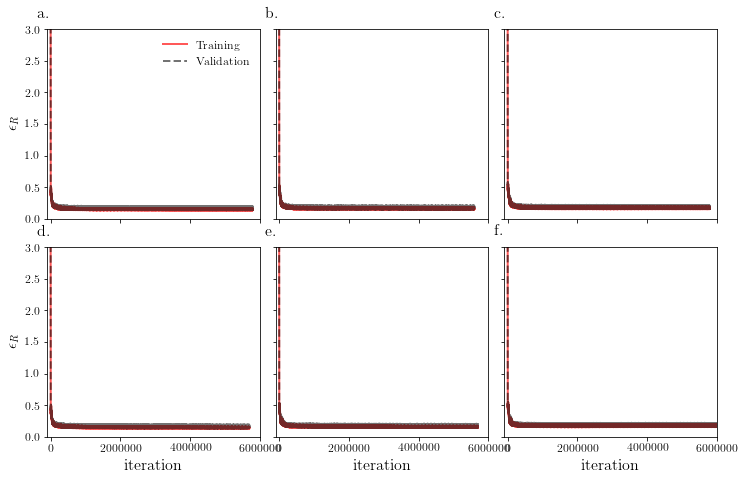

In [176]:
fig = plt.figure(figsize=(12, 7.5))
gs = gridspec.GridSpec(2, 3, wspace=0.075, hspace=0.15)
   
for cnt, net in enumerate(list_of_network):
    i = int(cnt/3)
    j = cnt%3    
   
    os.chdir(network_dir)
    os.chdir(net)
    train_losses = np.loadtxt('train_losses.dat')
    val_losses = np.loadtxt('val_losses.dat')
    train_losses =np.array([np.mean(train_losses[10*i:(i+1)*10]) for i in range(int(train_losses.shape[0]/10))] )
    val_losses =np.array([np.mean(val_losses[10*i:(i+1)*10]) for i in range(int(val_losses.shape[0]/10))] )
    
    ax = plt.subplot(gs[i, j])
    steps = np.array([100*(i+1) for i in range(train_losses.shape[0])])
    ax.plot(steps,train_losses,'r-', lw=2.0,  alpha=0.65, label='Training')
    ax.plot(steps,val_losses,  'k--', lw=2.0, alpha=0.55, label='Validation')
    
    
    if j == 0 :
        ax.set_ylabel('$\epsilon_{R}$', fontsize=15)
    if not j == 0:
        plt.setp(ax.get_yticklabels([]), visible=False)
    if i ==0:
        plt.setp(ax.get_xticklabels([]), visible=False)
   
    if i ==1:
        ax.set_xlabel('iteration', fontsize=16)
    if i == 0  and j ==0 :
        ax.legend(frameon=False)
    ax.text(-0.05, 1.06, e_label[cnt], transform= ax.transAxes, size=16, weight='bold')
    ax.set_xlim(-1e5,6e6) 
    ax.set_ylim(0, 3.0)
    
os.chdir(result_dir)
plt.savefig('Loss.jpeg', dpi=150)
plt.show()
